# Video Game Sales Data Analysis and Visualisation

## Introduction

Understanding market trends and sales performance is essential for gamers, developers, and industry enthusiasts in the ever-evolving gaming world. This Video Games Sales Dataset has been sourced from Kaggle and consists of data on video games that have achieved sales exceeding 100,000 from 4 global regions.

This notebook takes you through the entire data analysis journey, from data cleaning to generating meaningful analytics, creating insightful visualizations, and providing well-justified decision-making processes. Furthermore, various sales factors are considered, offering valuable insights into the global video game sales trends.

Objective: Identify global trends in video game sales and generate and present findings in a simple and informative way.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Loading the Dataset

In [46]:
sns.set_style("whitegrid")

# load dataset
df = pd.read_csv('vgsales.csv')

## Describing the data

The following queries show the steps taken to understand the data.

In [47]:
# returns descriptive statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [49]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
# find the number of rows and columns 
num_rows, num_columns = df.shape
("Number of rows", {num_rows}, "Number of columns", {num_columns})

('Number of rows', {16598}, 'Number of columns', {11})

In [51]:
# data type of all columns in the dataframe
data_types = df.dtypes
data_types

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Data Cleaning and Preparation

As part of data preprocessing, the data is cleaned to ensure that the data is accurate, reliable, and suitable for analysis. 

Several techniques are used to ensure a high degree of excellence exhibited by the data in relation to the real-world scenario.

### Incomplete Data
An imcomplete data check is performed using the lambda function. It counts the number of non-missing values in each row where it does not meet the required threshold. It returns a boolean series of true and false which can identify the number of rows with incomplete data.

In [52]:
# incomplete data check
min_required_values_thresh = 11
incomplete_rows = df.apply(lambda row: row.count(), axis=1) < min_required_values_thresh
count_incomplete_rows = incomplete_rows.sum()

f"Number of rows with less than {min_required_values_thresh} non-missing values: {count_incomplete_rows}"

'Number of rows with less than 11 non-missing values: 307'

In [53]:
# calculate the missing values in each column of the datase
# isnill - creates a dataframe where cells contain true (missing) or false
# sums the true values
missing_values = df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [54]:
# checks if there is atleast one true (missing) value along each column
any_values = df.isnull().any()
print("Any Values:")
any_values

Any Values:


Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

### Handling Missing Values
The initial heatmap displays a visual representation of missing values in the dataset.

<Axes: >

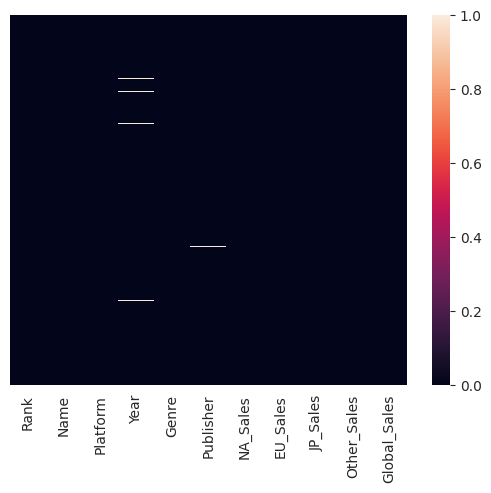

In [55]:
# heatmap to show missing values in the dataframe
initial_hm = sns.heatmap(df.isna(), yticklabels=False)
initial_hm

The percentage of missing values in the publisher column is 0.35%. Therefore, removing them has very minimal impact on the overall size of the dataset, and the loss of data points are acceptable as they improve data quality as missing values. Some statistical analysis methods used later will require complete data, so rows with missing values are dropped to prevent errors or biases in results.

In [56]:
# calculate total rows
total_rows = len(df)

# get missing publisher count
missing_publisher_values = df["Publisher"].isnull().sum()

# find percentage missing for publisher column
percentage_missing_publisher = (missing_publisher_values / total_rows) * 100

f"Percentage missing values in the publisher column: {percentage_missing_publisher:.2f}%"

'Percentage missing values in the publisher column: 0.35%'

In [57]:
# as there are only 0.35% missing values, drop missing rows
missing_publisher_count_before = df['Publisher'].isnull().sum()
df.dropna(subset=['Publisher'], inplace=True)
missing_publisher_count_after = df['Publisher'].isnull().sum()
f"Number of missing values in the Publisher column after drop: {missing_publisher_count_after}"

'Number of missing values in the Publisher column after drop: 0'

<Axes: >

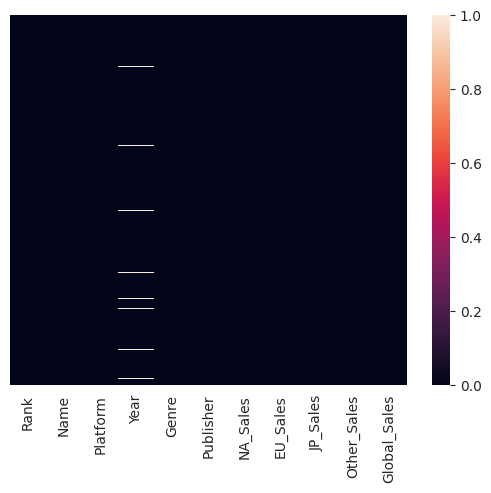

In [58]:
# heatmap to show missing values in the dataframe
new_hm = sns.heatmap(df.isna(), yticklabels=False)
new_hm

In [59]:
total_rows = len(df)
missing_year_values = df["Year"].isnull().sum()
percentage_missing_year = (missing_year_values / total_rows) * 100

f"Percentage missing values in the Year column: {percentage_missing_year:.2f}%"

'Percentage missing values in the Year column: 1.51%'

The percentage of missing values in the year column is 1.51%. It is reasonable to drop the rows with missing values in this case. However, assuming publishers have consistent release cycles of new games, one imputation approach is filling data with the most common year for each publisher. With only 1.51% of missing values, imputed years derived from existing data ensures the imputation is transparent and justifiable and does not significantly impact the dataframe. Better methods include using linear regression imputation, where a model is trained to predict missing years, finding and additional release date dataset, or manually filling in the missing years as accurate release data is available online.

In [60]:
# fill missing years based on the most common year for each publisher
df['Year'] = df.groupby('Publisher')['Year'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
missing_values = df['Year'].isnull().sum()
(f"Number of missing values in the Year column after imputation: {missing_values}")

'Number of missing values in the Year column after imputation: 2'

In [61]:
df.dropna(subset=['Year'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [62]:
missing_values_after = df['Year'].isnull().sum()
(f"Number of missing values in the Year column after dropping rows: {missing_values_after}")

'Number of missing values in the Year column after dropping rows: 0'

The final heatmap shows no missing values in the dataframe.

<Axes: >

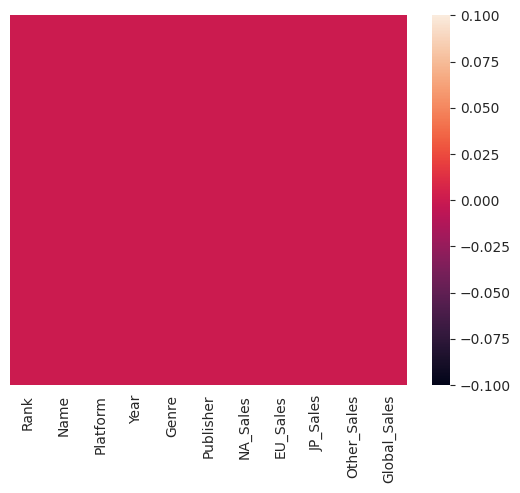

In [63]:
# heatmap to show missing values in the dataframe
final_hm = sns.heatmap(df.isna(), yticklabels=False)
final_hm

In [64]:
final_missing_values = df.isnull().sum()
print("Missing Values:")
final_missing_values

Missing Values:


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Handling Validity and Data Constraints Compliance
The year column was stored as a float data type and was converted to an integer to comply with the data constraint needed for analysis, ensuring validity. For all sales columns with numerical float data, the precision has been enforced to be uniform. 

In [65]:
# change the data type of the year column to int
df['Year'] = df['Year'].astype(int)
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [66]:
# ensure precision for region sales is the same
precision = 2 
columns_for_precision = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for column in columns_for_precision:
    df[column] = df[column].round(precision)

In [67]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Handling Incompletness and Bias
Listing the unique years has highlighted that the dataframe does not include the years between 2017 and 2020. This is a problem as a continuous and complete time series data is needed for analysis. The years 2017 and 2020 have an extremely low number of completed data rows and cannot be predicted reliably from other columns. There could be a reason for the absence of data in these years, such as biased data collection or incompleteness. The best option is to remove the irrelevant years.

In [68]:
# list unique years
unique_years_sorted = sorted(df['Year'].unique())
print(unique_years_sorted)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]


In [69]:
# complete data for each year
for year in unique_years_sorted:
    count = (df['Year'] == year).sum()
    print(f"Year: {year}, Number of Data Rows: {count}")

Year: 1980, Number of Data Rows: 9
Year: 1981, Number of Data Rows: 46
Year: 1982, Number of Data Rows: 36
Year: 1983, Number of Data Rows: 17
Year: 1984, Number of Data Rows: 14
Year: 1985, Number of Data Rows: 14
Year: 1986, Number of Data Rows: 21
Year: 1987, Number of Data Rows: 16
Year: 1988, Number of Data Rows: 15
Year: 1989, Number of Data Rows: 17
Year: 1990, Number of Data Rows: 16
Year: 1991, Number of Data Rows: 41
Year: 1992, Number of Data Rows: 43
Year: 1993, Number of Data Rows: 60
Year: 1994, Number of Data Rows: 121
Year: 1995, Number of Data Rows: 219
Year: 1996, Number of Data Rows: 264
Year: 1997, Number of Data Rows: 289
Year: 1998, Number of Data Rows: 379
Year: 1999, Number of Data Rows: 338
Year: 2000, Number of Data Rows: 349
Year: 2001, Number of Data Rows: 482
Year: 2002, Number of Data Rows: 850
Year: 2003, Number of Data Rows: 783
Year: 2004, Number of Data Rows: 751
Year: 2005, Number of Data Rows: 938
Year: 2006, Number of Data Rows: 1011
Year: 2007, Num

In [70]:
# drop rows with 2017 and 2020 as year values, and check all nan or null years are dropped
df_filtered = df[(df['Year'] != 2017) & (df['Year'] != 2020)].dropna(subset=['Year'])
new_unique_years = sorted(df_filtered['Year'].unique())
print(new_unique_years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


## Handling Outliers
Handling outliers is essential, as a small number of extreme values can affect the mean and standard deviation. The following function uses a box plot method to detect outliers using percentiles and quartiles. The function uses an upper and lower bound of 3.0 times the IQR is set to highlight extreme outliers (not mild outliers). The percentage of outliers in each sales column is output. Now the outliers have been identified, games with exceptionally high or low sales figures could likely be outliers. At this stage, the decision has been made not to drop a significant subset of the dataframe as the data could be helpful in future data analysis and chart creation. Therefore, outliers will be handled during chart creation for the specific trend that is being investigated.

In [71]:
# handling outliers in the regions sales columns
# using the box plot method
columns_to_handle_outliers = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

def handle_outliers_boxplot(df, columns_to_handle_outliers):
    for column in columns_to_handle_outliers:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        # 3.0 is used to highlight extreme outliers
        lower_bound = q1 - 3.0 * iqr
        upper_bound = q3 + 3.0 * iqr
    
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
        # calculate the percentage of outliers using len
        total_data_points = len(df)
        percentage_outliers = (len(outliers) / total_data_points) * 100
    
        print(f"number of outliers in the '{column}' column: {len(outliers)}")
        print(f"percentage of outliers in the '{column}' column: {percentage_outliers:.2f}%")
        
# calll the function        
handle_outliers_boxplot(df, columns_to_handle_outliers)

number of outliers in the 'NA_Sales' column: 943
percentage of outliers in the 'NA_Sales' column: 5.70%
number of outliers in the 'EU_Sales' column: 1275
percentage of outliers in the 'EU_Sales' column: 7.71%
number of outliers in the 'JP_Sales' column: 1735
percentage of outliers in the 'JP_Sales' column: 10.49%
number of outliers in the 'Other_Sales' column: 1037
percentage of outliers in the 'Other_Sales' column: 6.27%


In [72]:
# find the number of rows and columns 
final_num_rows, final_num_columns = df.shape

("Number of rows", {final_num_rows}, "Number of columns", {final_num_columns})

('Number of rows', {16538}, 'Number of columns', {11})

### Removing Redundancy

The following code shows non-unique combinations of rows that are stored in the database. Redundancy occurs when information of the same observation is held within the dataframe without need. For Madden 13, the column with ID 602 stores the accurate sales data, whereas a duplicate row is stored with 0 values. For Metroid Prime, the redundancy is multiple inputs. For these reasons, the suitable choice is to drop the non-unique rows but keep the first occurrence for each.

In [73]:
# find the rows that are stored more than once
non_unique_combinations = df[df.duplicated(subset=["Name", "Platform", "Year", "Genre", "Publisher"], keep=False)]
non_unique_combinations

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
602,604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
14951,15000,Wii de Asobu: Metroid Prime,Wii,2004,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14953,15002,Wii de Asobu: Metroid Prime,Wii,2004,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
16075,16130,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [74]:
# drop the non unique rows but keep the first occurance 
non_unique_new = df.drop_duplicates(subset=["Name", "Platform", "Year", "Genre", "Publisher"], keep='first', inplace=True)
non_unique_new

In [75]:
check_null_values = df.isnull().sum()
(check_null_values)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [76]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Insights - Summary Statistics and Data Visualisations

The following summaries have been created using statistical techniques using numpy and pandas and can help find interesting insights in the video games sales dataset.

### Total global sales

In [77]:
# total global sales
total_global_sales = df['Global_Sales'].sum()
f"Total Global Sales: {total_global_sales} million"

'Total Global Sales: 8904.85 million'

### Top ten selling games globally

In [78]:
# top ten selling games
top_selling_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
top_selling_games[['Rank', 'Name', 'Global_Sales']]

,Rank,Name,Global_Sales
0,1,Wii Sports,82.74
1,2,Super Mario Bros.,40.24
2,3,Mario Kart Wii,35.82
3,4,Wii Sports Resort,33.00
4,5,Pokemon Red/Pokemon Blue,31.37
5,6,Tetris,30.26
6,7,New Super Mario Bros.,30.01
7,8,Wii Play,29.02
8,9,New Super Mario Bros. Wii,28.62
9,10,Duck Hunt,28.31


### Top five selling games per region

In [79]:
# top five selling games per region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for region in regions:
    top_five_selling_games = df.nlargest(5, region)
    display(top_five_selling_games[['Name', region]])

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,29.08
9,Duck Hunt,26.93
5,Tetris,23.20
2,Mario Kart Wii,15.85


,Name,EU_Sales
0,Wii Sports,29.02
2,Mario Kart Wii,12.88
3,Wii Sports Resort,11.01
10,Nintendogs,11.00
16,Grand Theft Auto V,9.27


,Name,JP_Sales
4,Pokemon Red/Pokemon Blue,10.22
12,Pokemon Gold/Pokemon Silver,7.20
1,Super Mario Bros.,6.81
6,New Super Mario Bros.,6.50
20,Pokemon Diamond/Pokemon Pearl,6.04


,Name,Other_Sales
17,Grand Theft Auto: San Andreas,10.57
0,Wii Sports,8.46
47,Gran Turismo 4,7.53
16,Grand Theft Auto V,4.14
2,Mario Kart Wii,3.31


### Finding the top three platforms for each genre based on the global sales of  games

In [80]:
# genere and platform sales 
genre_platform_sales = df.groupby(['Genre', 'Platform'])['Global_Sales'].sum().reset_index()
top_platforms_by_genre = genre_platform_sales.groupby('Genre').apply(lambda x: x.nlargest(3, 'Global_Sales')).reset_index(drop=True)
(top_platforms_by_genre)

,Genre,Platform,Global_Sales
0,Action,PS3,307.88
1,Action,PS2,272.76
2,Action,X360,242.67
3,Adventure,DS,47.29
4,Adventure,PS3,22.88
5,Adventure,PS2,21.16
6,Fighting,PS2,89.39
7,Fighting,PS,72.68
8,Fighting,PS3,51.70
9,Misc,Wii,221.06


### Total game sales by region

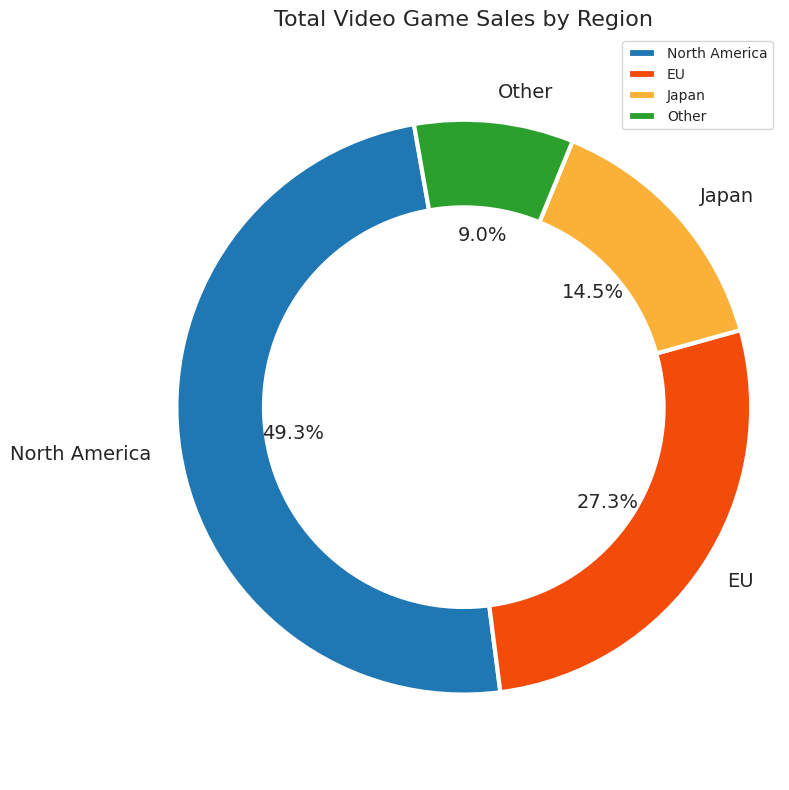

In [81]:
# donut chart to total sales by region 
# sum the regions
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

colors = ['#1f77b4', '#f34B0A', '#fbb038', '#2ca02c']
plt.figure(figsize=(8, 8))
plt.pie(
    region_sales,
    # labels
    labels=['North America', 'EU', 'Japan', 'Other'],
    autopct='%1.1f%%',
    startangle=100,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=3),
    colors=colors,
    textprops={'fontsize': 14},  
)

# create a new circle
new_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(new_circle)
plt.axis('equal')
plt.title('Total Video Game Sales by Region', fontsize=16) 

plt.legend(['North America', 'EU', 'Japan', 'Other'], loc='upper right')
plt.tight_layout()
plt.show()


### All time best selling platforms

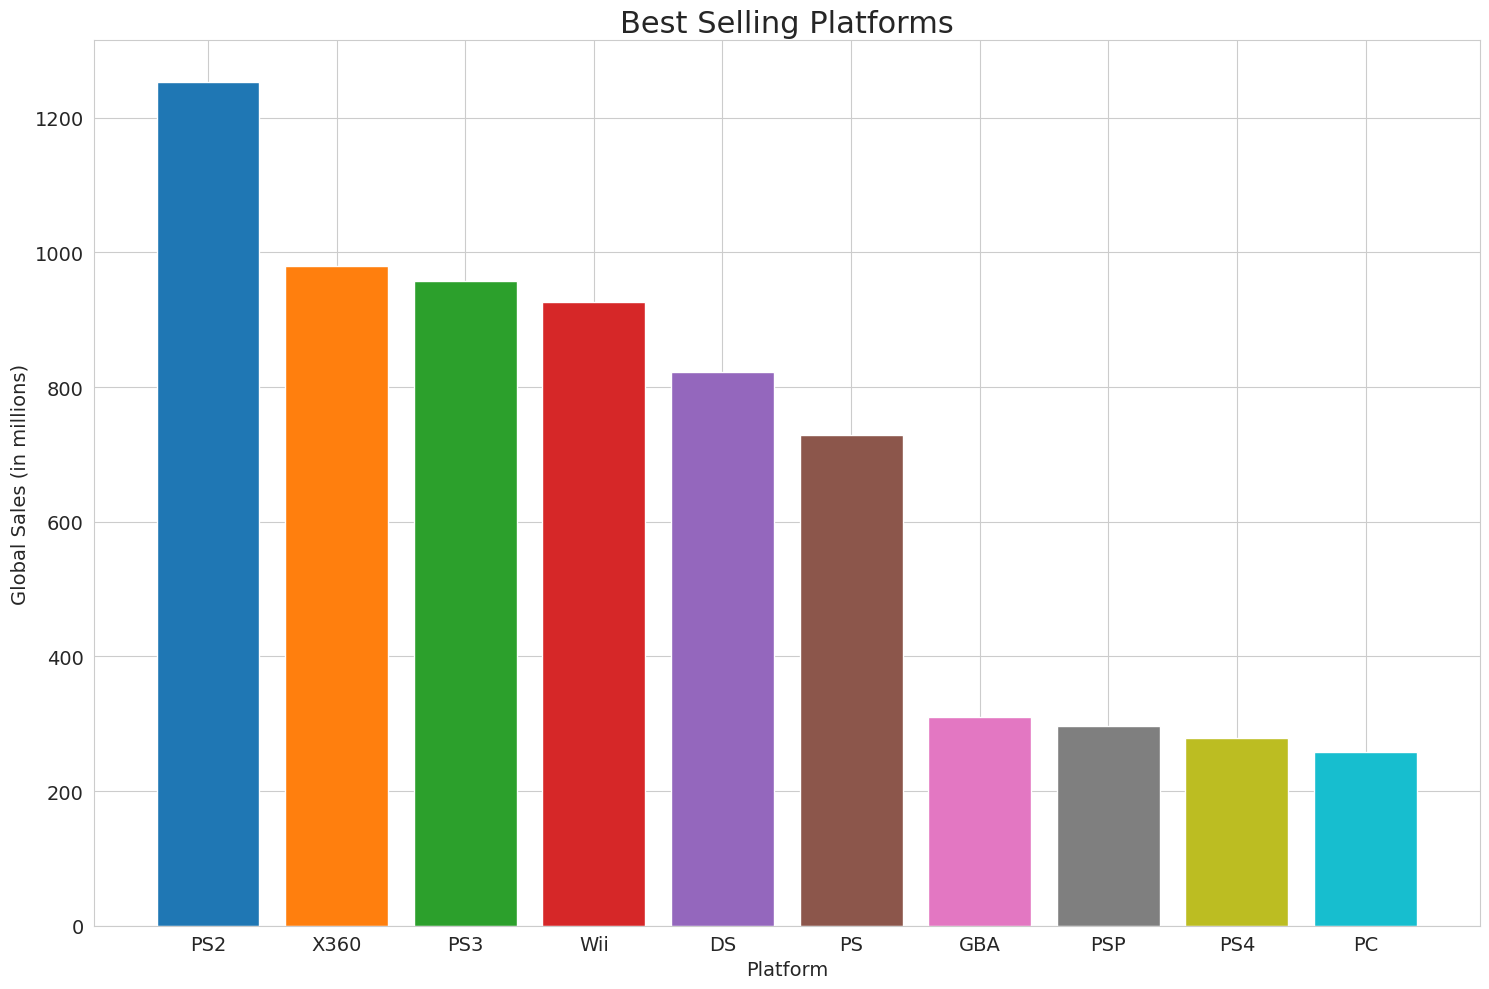

In [82]:
# find top 10 platforms to plot
sales_for_platform = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)

# use palette 
colors = sns.color_palette("tab10")
plt.figure(figsize=(15, 10))

# create bar chart
plt.bar(sales_for_platform.index, sales_for_platform, color=colors, width=0.8)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Global Sales (in millions)', fontsize=14)
plt.title('Best Selling Platforms', fontsize=22)

# for readability
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.show()

### Sales performance by region

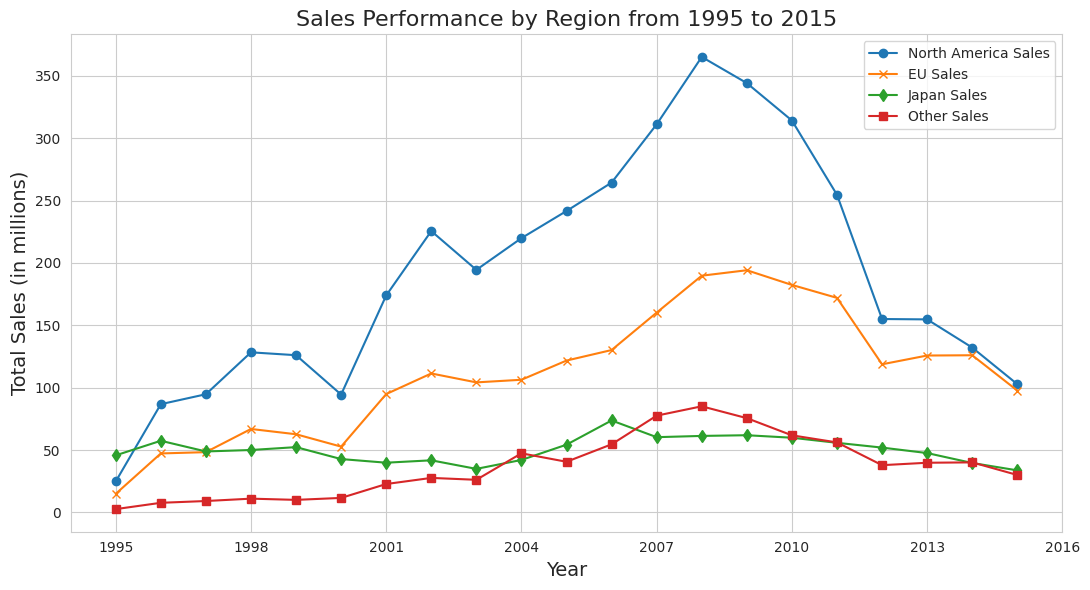

In [83]:
# create df for the years of useful data
sales_perf_df = df[(df['Year'] >= 1995) & (df['Year'] <= 2015)]

yearly_sales = sales_perf_df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# create line plot
plt.figure(figsize=(11, 6)) 
plt.plot(yearly_sales.index, yearly_sales['NA_Sales'], label='NA Sales', marker='o')
plt.plot(yearly_sales.index, yearly_sales['EU_Sales'], label='EU Sales', marker='x')
plt.plot(yearly_sales.index, yearly_sales['JP_Sales'], label='JP Sales', marker='d')
plt.plot(yearly_sales.index, yearly_sales['Other_Sales'], label='Other Sales', marker='s')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.title('Sales Performance by Region from 1995 to 2015', fontsize=16)
plt.legend(['North America Sales', 'EU Sales', 'Japan Sales', 'Other Sales'])
ax = plt.gca()

# set x-axis ticks to integer values using ticker import
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.tight_layout()
plt.show()


### Video games count by genre

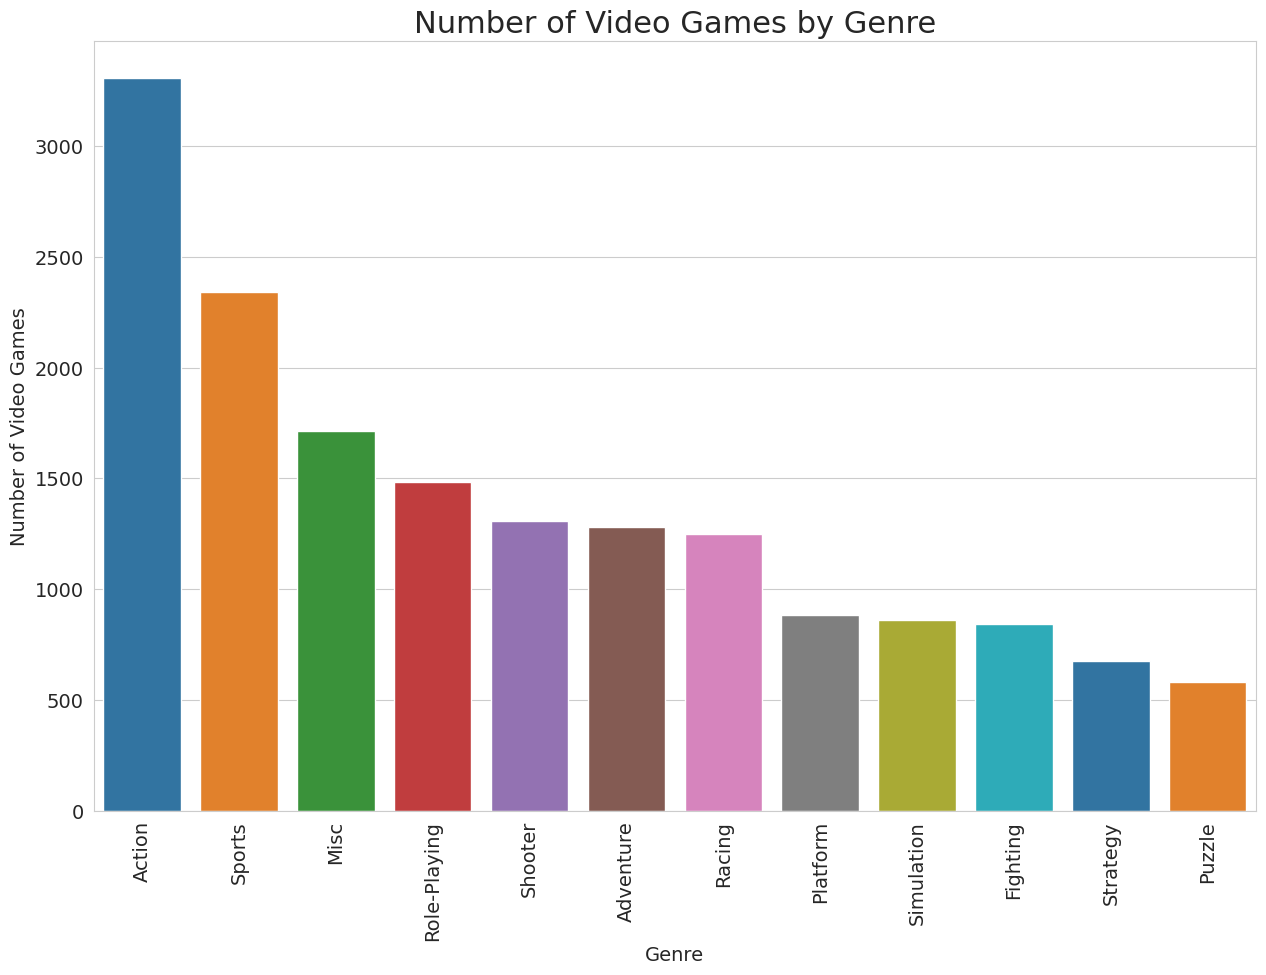

In [84]:
colors = sns.color_palette("tab10")
plt.figure(figsize=(15, 10))

# create countplot
sns.countplot(x="Genre", data=df, order=df['Genre'].value_counts().index, palette=colors)

plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Video Games', fontsize=14)
plt.title('Number of Video Games by Genre', fontsize=22)
plt.yticks(fontsize=14)
plt.show()


### Sales for the four regions compared to global sales

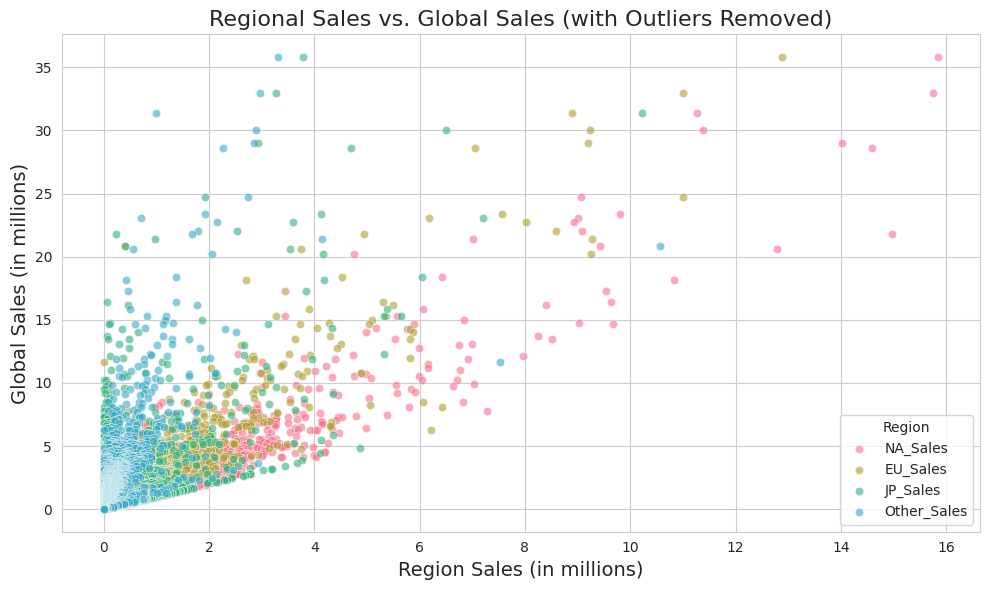

In [85]:
region_thresh = 20  # 20 million
global_thresh = 60  # 60 million


# create new df for excluding outliers
compare_region_global_df = df[(df['NA_Sales'] <= region_thresh) & (df['EU_Sales'] <= region_thresh) 
                              & (df['JP_Sales'] <= region_thresh) & (df['Other_Sales'] <= region_thresh)
                              & (df['Global_Sales'] <= global_thresh)]


plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 5)
# iterate through four regions and and color from the palette
for region, color in zip(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], palette):
    # plot the data
    sns.scatterplot(data=compare_region_global_df, x=region, y='Global_Sales', label=region, alpha=0.6, color=color)
    
    

plt.xlabel('Region Sales (in millions)', fontsize=14)
plt.ylabel('Global Sales (in millions)', fontsize=14)
plt.title('Regional Sales vs. Global Sales (with Outliers Removed)', fontsize=16)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# add markers using seaborn markers = ['o', 's', 'd', '^'] using zip and iterate through regions

### Viewing sales by genre for each specific region

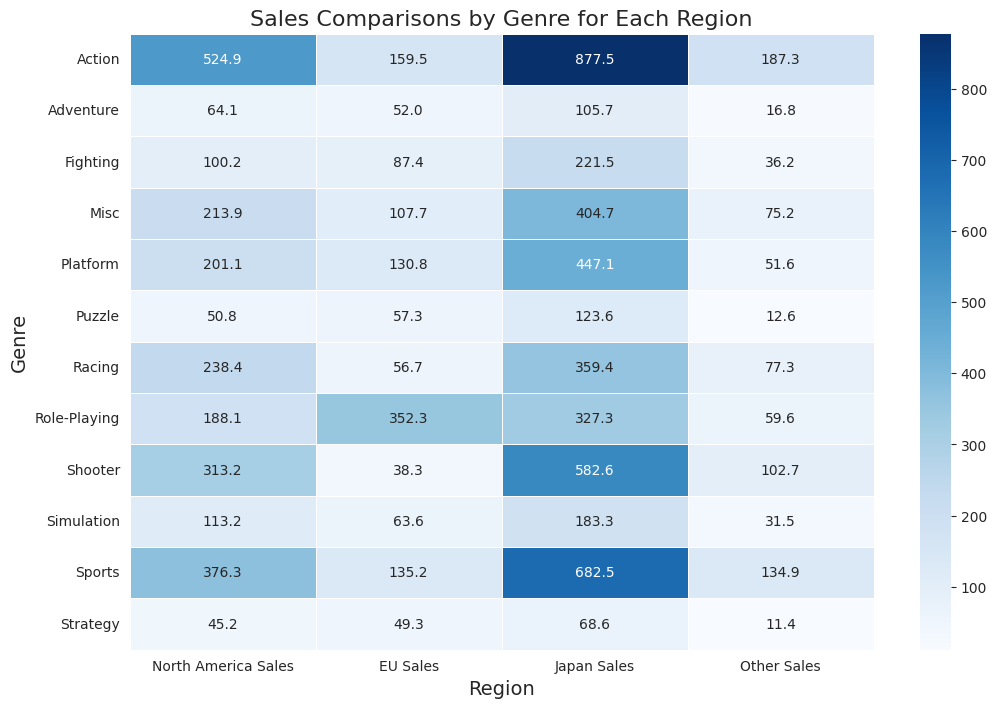

In [86]:
# create a pivot table to aggregate sales by genre and region
hm_pivot_table = df.pivot_table(index='Genre', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc='sum')
hm_pivot_table.columns = ['North America Sales', 'EU Sales', 'Japan Sales', 'Other Sales']

# create a heatmap with cmap 
# blue shades are best for colorblindness and general readability
plt.figure(figsize=(12, 8))
sns.heatmap(hm_pivot_table, cmap='Blues', annot=True, fmt=".1f", linewidths=.5)

plt.title('Sales Comparisons by Genre for Each Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show()

### Find the year with the highest game sales for playStation platforms from 1980 to 2016

In [87]:
playstation_platforms_list = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']

# create a new dataframe to search for playstation platforms in the dataset
ps_df = df[(df['Platform'].isin(playstation_platforms_list)) & (df['Year'].between(1980, 2016))]

# group by year and platform to for EU to find the sum 
total_sales_by_year_platform = ps_df.groupby(['Year', 'Platform'])['EU_Sales'].sum()
# find the year where the number of game sales was highest for each playstation platform
top_years_by_platform = total_sales_by_year_platform.reset_index().groupby('Platform').apply(lambda x: x['Year'][x['EU_Sales'].idxmax()])
for platform, year in top_years_by_platform.items():
    print(f"{platform}: {year}")


PS: 1998
PS2: 2002
PS3: 2011
PS4: 2015
PSP: 2007
PSV: 2012


### Growth in games sales for all playstation platforms in North America

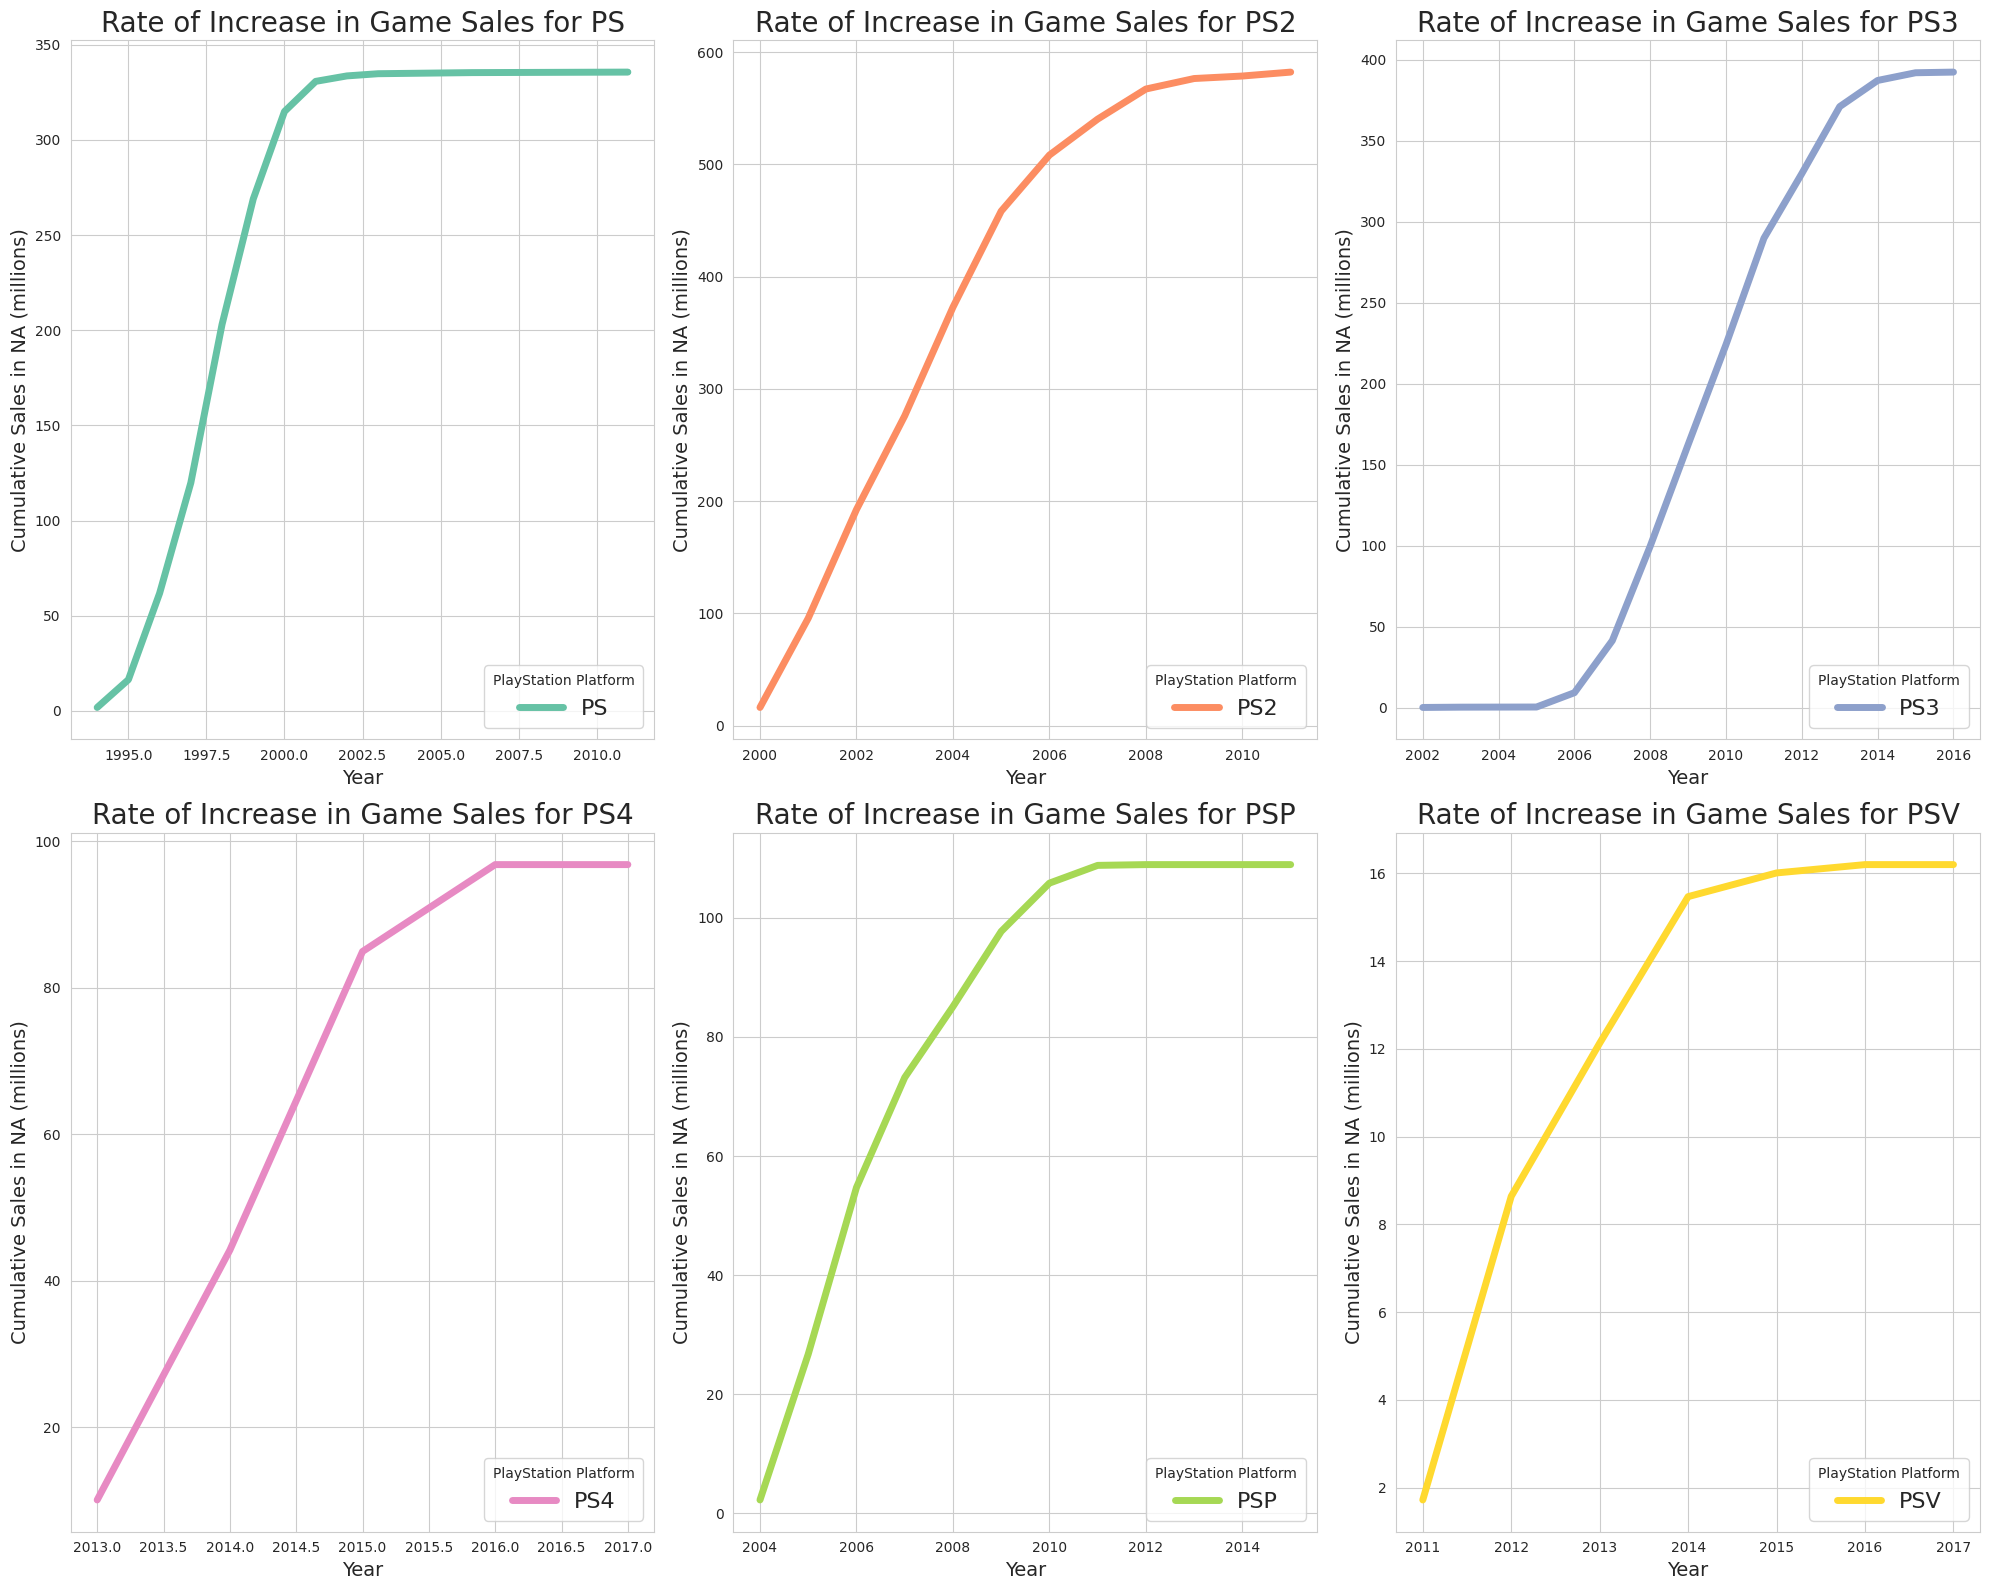

In [88]:
# function to filter the dataframe for the selected ps platform
def filter_data(df, selected_platform):
    # filter rows for our selected platforms
    return df[df['Platform'] == selected_platform]

# function calculates the cumulative sum of  NA sales
def cumulative_sum_of_NA_sales(data):
    # group by year and sum the NA sales for each year and cumulate
    return data.groupby('Year')['NA_Sales'].sum().cumsum()

# function takes subplot ax, selected platform and sales data as arguments
def generate_ps_subplot(ax, selected_platform, sales_data):
    # plot sales data on the years axis ad the sales on the y axis
    ax.plot(sales_data.index, sales_data.values, label=selected_platform, 
            color=sns.color_palette("Set2")[i], linewidth=5)
    # set labels for each
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Cumulative Sales in NA (millions)', fontsize=14)
    # selected platform is for individual ps platform
    ax.set_title(f'Rate of Increase in Game Sales for {selected_platform}', fontsize=20)
    ax.grid(True)
    ax.legend(loc='lower right', title='PlayStation Platform', prop={'size': 16})

# layout 2 rows by 3 columns
nrows = 2
ncols = 3

figsize = (20, 16)
# using the variable axes for multiple axes
# stores an array of subplot axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# for loop iterates through each platform in the list created previously
# where i takes teh value of each platform 
for i, selected_platform in enumerate(playstation_platforms_list):
    # convert i into row and column index to access the required subplot
    row, col = divmod(i, ncols)
    # assign the subplot to ax
    ax = axes[row, col]

    # call the functions
    # filter the dataframe on selected platform
    platform_data = filter_data(df, selected_platform)
    # get the cumulative sum of na sales for that platform
    sales_data = cumulative_sum_of_NA_sales(platform_data)
    # use the generae function to create a subplot for the platform
    generate_ps_subplot(ax, selected_platform, sales_data)
    
plt.tight_layout()
plt.show()


# Conclusion

### Findings

The key findings and insights discovered during data analysis and data visualisation are summarised below:

- The best selling gaming platform in the dataset is the PS2
- North America holds the highest percentage of global sales at 49.3%
- North America has the highest regional sales from 1995 to 2015
- Starting from 2008, there was a significant decline in sales across all regions, indicating new market dynamics which need to be explored
- The most common game genre in the dataset is Action, closely followed by Sports
    - In NA, the genre with the highest sales is Action
    - In EU, the genre with the highest sales is Role Playing
    - In Japan - the genre with the highest sales is Action
- Comparison of cumulative game sales for each playstation platform over the years showed very interesting results 
    - Game sales for the PS2 platform exhibited the highest rate of increase and reached over 550 million in cumulative sales in NA
    - Game sales for the PSV platform exhibited the lowest rate of increase and reached 16 million in cumulative sales in NA

### Improvements

Here are some improvements for the future:

- Identify explanations for the findings discovered
- Regional vs Global sales scatterplot indicates correlations between variables but the grain of data points need to be corrected by handling lower bound outliers for the regional and global sales columns
- Correct the year axis on one of the subplot visualisations to ensure the precision matches
- Research ways to efficiently handle outliers in the dataset during the data cleaning process, such as Winsorization, to make the chart creation process easier
- Add interactive features to visualisations to allow users to explore trends clearly
- Colour consistency and style: Be consistent across visualisations